<a href="https://colab.research.google.com/github/eun-woo/data_analysis/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset("titanic")


In [3]:
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [4]:
titanic['age'].median()

28.0

In [5]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [6]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [7]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [8]:
##결측치 전처리
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'] = titanic['embarked'].fillna('S')
titanic['deck'] = titanic['deck'].fillna('C')
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')
print(titanic.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

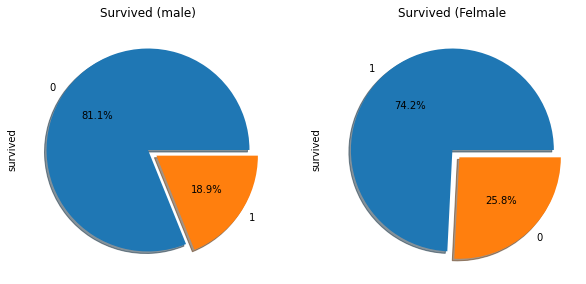

In [11]:
##남/여 승객의 생존율 확인

import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 2, figsize=(10, 5))
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow=True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax=ax[1], shadow=True)

ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (Felmale')

plt.show()

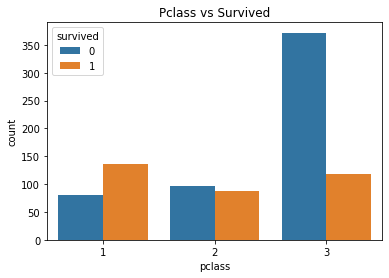

In [16]:
## 객실 등급별 생존자 수
sns.countplot(x = 'pclass', hue = 'survived', data = titanic)

plt.title('Pclass vs Survived')
plt.show()



In [17]:
##변수 사이의 상관계수
titanic_corr = titanic.corr(method='pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [18]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053257

In [19]:
titanic['survived'].corr(titanic['fare'])

0.2573065223849625

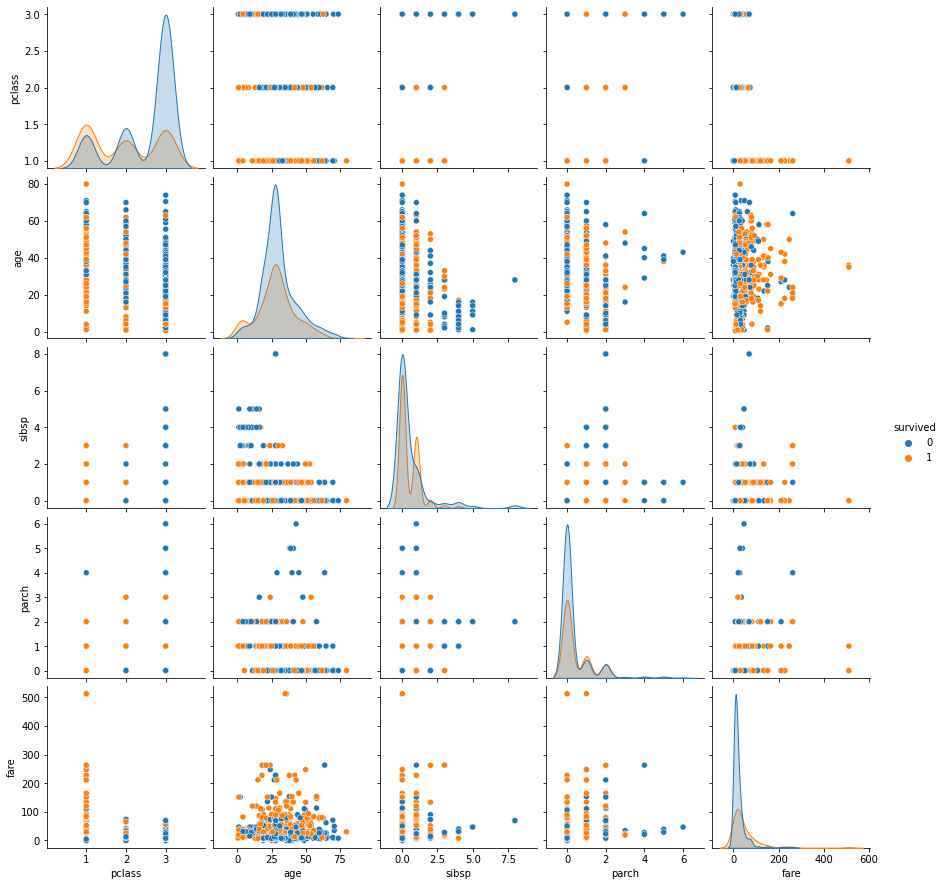

In [20]:
##산점도로 상관분석

sns.pairplot(data=titanic, hue = 'survived', vars = ['pclass', 'age', 'sibsp', 'parch', 'fare'])

plt.show()

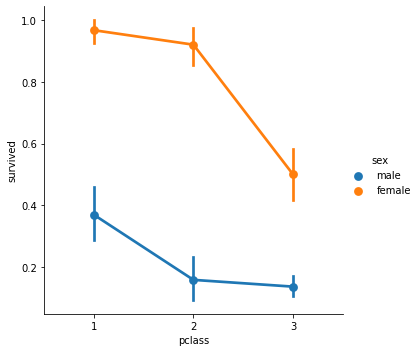

In [21]:
##생존자의 객실 등급과 성별 관계
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')
plt.show()

In [22]:
def category_age(x):
  if x < 10:
    return 0

  elif x < 20:
    return 1
  
  elif x < 30:
    return 2

  elif x < 40:
    return 3
  
  elif x < 50:
    return 4
  
  elif x < 60:
    return 5
  
  elif x < 70:
    return 6

  else:
    return 7

titanic['age2'] = titanic['age'].apply(category_age)
titanic['sex'] = titanic['sex'].map({'male': 1, 'female': 0})
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1


In [23]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2,1
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,1
888,0,3,0,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2,4
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2,1


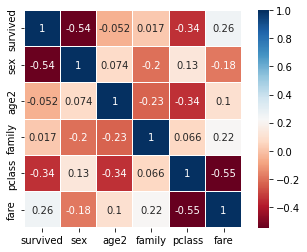

In [25]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]
colormap = plt.cm.RdBu
sns.heatmap(heapmap_data.astype(float).corr(), linewidths = 0.1, vmax=1.0, square = True, cmap = colormap, linecolor='white', annot=True, annot_kws={"size": 10})

plt.show()